In [1]:
from sklearn.datasets import load_iris

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
iris = load_iris()
iris_frame = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target'])
iris_frame['target'] = iris_frame['target'].map({0: 'setosa', 1: 'versicolor', 2:'virginica'})
X = iris_frame.iloc[:, :-1]
Y = iris_frame.iloc[:, [-1]]
iris_frame.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Decision Tree

In [5]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=0, criterion='gini', max_depth=5)
import matplotlib.colors as colors

df1 = iris_frame[["sepal length (cm)" , "sepal width (cm)", "target" ]]
X = df1.iloc[:,0:2]
Y = df1.iloc[:,2].replace({'setosa':0,'versicolor':1,'virginica':2}).copy()

clf.fit(X,Y)
N=100

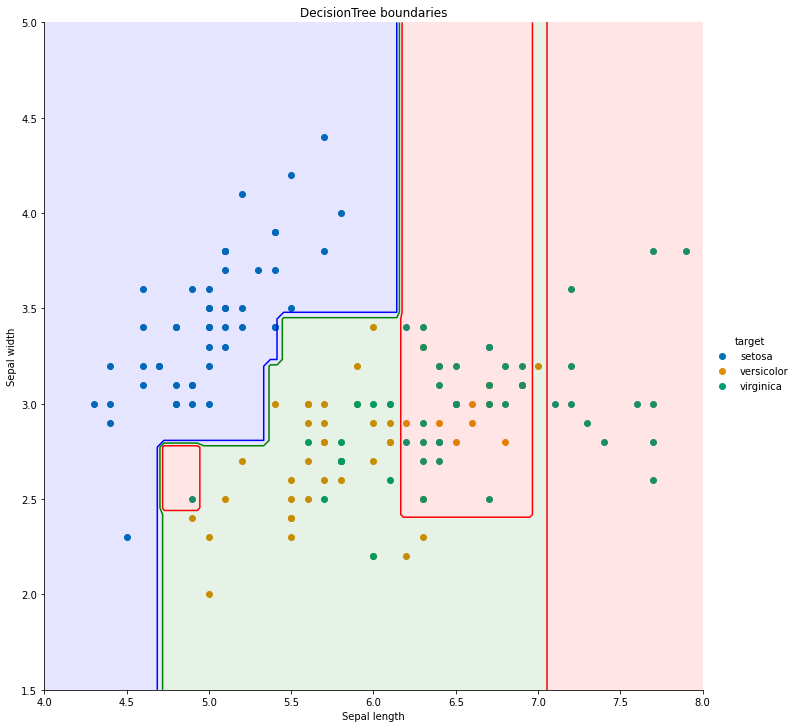

In [8]:
X_= np.linspace(4,8,N)
Y_= np.linspace(1.5,5,N)
X_,Y_= np.meshgrid(X_,Y_)

color_list= ['Blues','Greens','Reds']
my_norm = colors.Normalize(vmin=-1,vmax=1)
g= sns.FacetGrid(iris_frame, hue = "target", height =10, 
                palette = 'colorblind').map(plt.scatter, "sepal length (cm)","sepal width (cm)",).add_legend()

my_ax = g.ax
zz = np.array( [clf.predict ([[xx,yy]]) [0] for xx,yy in zip(np.ravel(X_),np.ravel(Y_))])
Z=zz.reshape(X_.shape)

my_ax.contourf(X_,Y_,Z,2,alpha=.1, colors = ('blue','green','red'))
my_ax.contour(X_,Y_,Z,2,alpha=1, colors = ('blue','green','red'))

my_ax.set_xlabel('Sepal length')
my_ax.set_ylabel('Sepal width')
my_ax.set_title('DecisionTree boundaries')

#plt.show()

In [9]:
clf_entropy = DecisionTreeClassifier(random_state=0, criterion='entropy', max_depth=10)
clf_entropy.fit(X,Y)
N=100

Text(0.5, 1.0, 'DecisionTree boundaries')

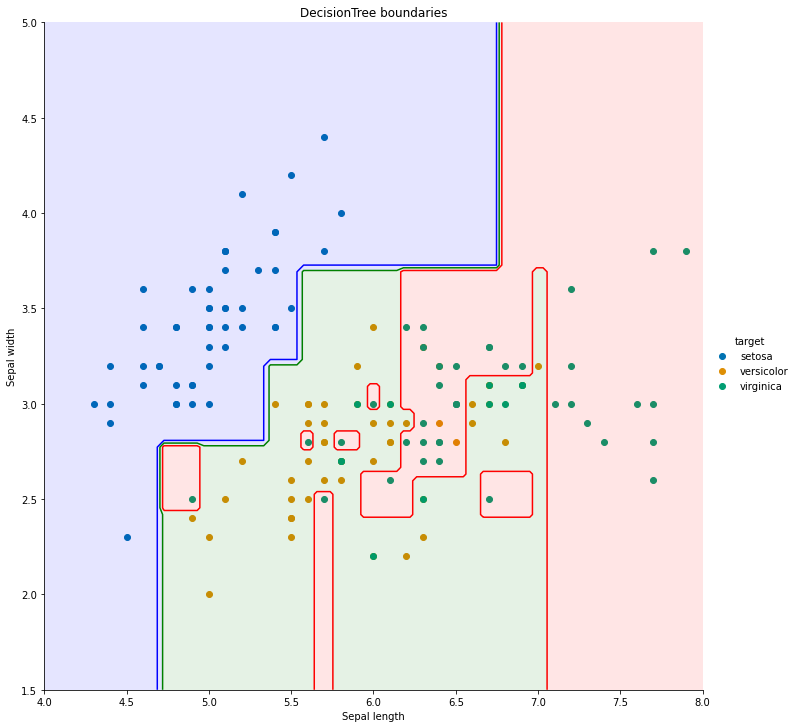

In [10]:
X_= np.linspace(4,8,N)
Y_= np.linspace(1.5,5,N)
X_,Y_= np.meshgrid(X_,Y_)

color_list= ['Blues','Greens','Reds']
my_norm = colors.Normalize(vmin=-1,vmax=1)
g= sns.FacetGrid(iris_frame, hue = "target", height =10, 
                palette = 'colorblind').map(plt.scatter, "sepal length (cm)","sepal width (cm)",).add_legend()

my_ax = g.ax
zz = np.array( [clf_entropy.predict ([[xx,yy]]) [0] for xx,yy in zip(np.ravel(X_),np.ravel(Y_))])
Z=zz.reshape(X_.shape)

my_ax.contourf(X_,Y_,Z,2,alpha=.1, colors = ('blue','green','red'))
my_ax.contour(X_,Y_,Z,2,alpha=1, colors = ('blue','green','red'))

my_ax.set_xlabel('Sepal length')
my_ax.set_ylabel('Sepal width')
my_ax.set_title('DecisionTree boundaries')

In [15]:
clf_entropy2 = DecisionTreeClassifier(random_state=0, criterion='entropy',
                                      max_depth=4, splitter='random')
clf_entropy2.fit(X,Y)
N=100

Text(0.5, 1.0, 'DecisionTree boundaries')

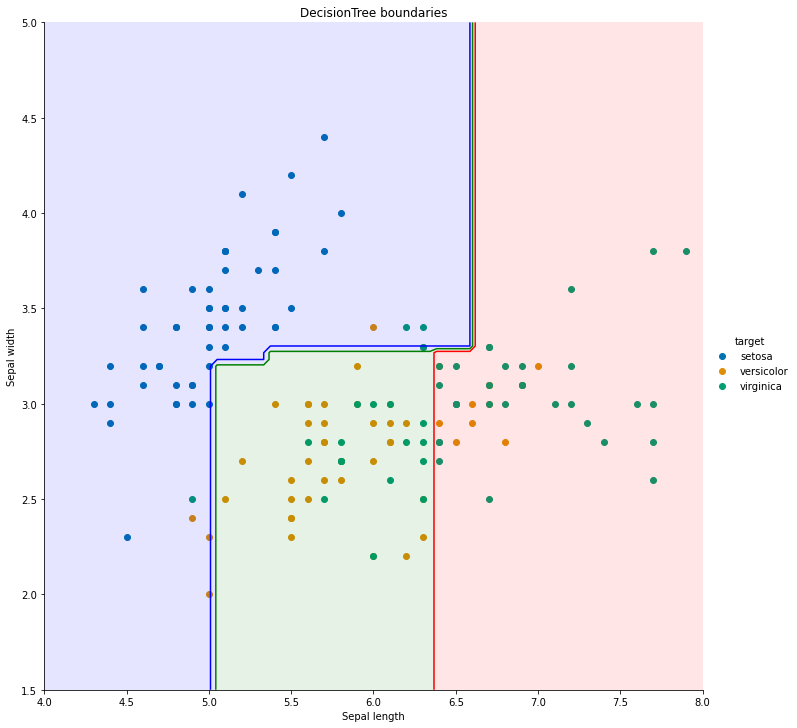

In [16]:
X_= np.linspace(4,8,N)
Y_= np.linspace(1.5,5,N)
X_,Y_= np.meshgrid(X_,Y_)

color_list= ['Blues','Greens','Reds']
my_norm = colors.Normalize(vmin=-1,vmax=1)
g= sns.FacetGrid(iris_frame, hue = "target", height =10, 
                palette = 'colorblind').map(plt.scatter, "sepal length (cm)","sepal width (cm)",).add_legend()

my_ax = g.ax
zz = np.array( [clf_entropy2.predict ([[xx,yy]]) [0] for xx,yy in zip(np.ravel(X_),np.ravel(Y_))])
Z=zz.reshape(X_.shape)

my_ax.contourf(X_,Y_,Z,2,alpha=.1, colors = ('blue','green','red'))
my_ax.contour(X_,Y_,Z,2,alpha=1, colors = ('blue','green','red'))

my_ax.set_xlabel('Sepal length')
my_ax.set_ylabel('Sepal width')
my_ax.set_title('DecisionTree boundaries')

## 그렇다면, decision tree로 나누어진 결과가 실제 데이터랑 얼마나 차이날까?

In [29]:
from sklearn.model_selection import train_test_split
X_tr, X_vld, Y_tr, Y_vld = train_test_split(X, Y, random_state=0, test_size=0.2)

clf_entropy2 = DecisionTreeClassifier(random_state=0, criterion='entropy',
                                      max_depth=4, splitter='random')
clf_entropy2.fit(X_tr,Y_tr)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='random')

In [30]:
from sklearn.metrics import confusion_matrix

Y_pred = clf_entropy2.predict(X_vld)

In [37]:
Y_vld.shape, Y_pred.shape

((30,), (30,))

In [35]:
confusion_matrix(Y_vld, Y_pred)

array([[11,  0,  0],
       [ 1,  8,  4],
       [ 1,  4,  1]], dtype=int64)

In [44]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
print(f'accuracy: {100*accuracy_score(Y_vld, Y_pred):.2f}%')

accuracy: 66.67%
